<a href="https://colab.research.google.com/github/Edward-TL/Beer_Statistics/blob/master/beer_stadistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Beer Stadistics
Una forma de explicar la aplicación de conceptos estadísticos, desarrollo de funciones y uso de gráficas con Python.

##Prólogo

Como ex-catedrático y asesor en tiempos libres de materias relacionadas a las matemáticas, la frase que más me ha podido molestar entre la gente es "las matemáticas no se usan". He de reconocer, que este pensamiento se debe a la falta de empatía que han tenido algunos docentes a la hora de enseñar. En lo personal, yo las veo como un juego, como la búsqueda de un tesoro a través de pistas, y llegar al resulto me da la misma emoción que haber concluido el nivel de algún videojuego.

Hace unos años, dí clases a adultos que querían obtener un título técnico en en servicios de perforación para la industria del petróleo. Entre ellos, resaltaba "Don Nato", un señor de 67 años que acabó hasta la secundaria por necesidad de trabajar. Se insertó en la industria del petróleo en perforación y cuando llegó la crisis, decidió titularse en la carrera que ejerció por más de 30 años. Cómo es de imaginar, él resaltaba sobre todo el grupo, y tenía ciertas limitaciones a la hora de repasar la teoría, 30 años sin ver teoría matemática no es algo que despreciar.

Dado que no era el único con estas carencias, arrastradas desde la escuela, procuraba siempre hacer las clases dinámicas y aplicables a su día cotidiana. El hecho de agregar temáticas como fiestas y borracheras con un análisis estadístico y matemático fue algo queb les gustó, ya que sacar costos y relación entre volúmenes se volvió su método para prácticar por excelencia.

Por todo lo anterior, y la pasión que compartimos por el análisis de los datos, te invito a que me acompañes en este análisis estadístico, no como un artículo formal, sino como una charla entre curiosos por saber cómo prefieren beber la cerveza en Sao Paulo. Si quieres acompañarme con una, eres bien recibido.

##Quality check de la información

Si uno quiere realizar una campaña de publicidad, debe de considerar ciertas variables aparte de la venta y la región. En este caso, alguien se dió a la tarea de analizar las ventas en Sao Paulo, Brasil, junto con la temperatura mínima, máxima y promedio de esos días, agregando la variable de la lluvia. Con ello y los días, solo queda una cosa por confirmar: ¿se vende más en los fines de semana o en entre semana? Para simplificar esto, gracias al dato de los días, el creador de este archivo decidió agregar la columna del fin de semana. Un "True" se considera como fin de semanay un "False" como lo que él considera día normal de la semana.

Cómo buena práctica, antes de hacer arreglos, verificaremos el estado de la información, ya que al ser un archivo csv, de otro país, existe la posibilidad de tener errores en los datos. De igual forma, se inicializan el chunck con las librerías que se necesitarán.

In [7]:
import scipy.stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import csv, os
from datetime import datetime

In [13]:
cerveza_df_or = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RetoCerveza/datasets_28454_184859_Consumo_cerveja.csv')
cerveza_df_or

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
cerveza_df_or.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

Como es posible observar, existen celdas con información nula, así como el uso de la coma decimal. El chunck anterior, nos permite ver que todo se ha vuelto un objeto, que el final de semana no es un valor booleano aunque maneje solo '1' y '0' y el consumo de la cerveza lo está considerando como unas decenas y no los miles que son. Por ello, tendremos que editar la información a través de una función diseñada para este caso en específico.

Sobre el nombre los arreglos y como conseguirlos, se puede usar de guía el nombre de las columnas. Como recordatorio, el siguiente chunck lo tendrá, y se dejará a consideración del lector si usarlos o no.

In [6]:
cerveza_df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

Remarcando que, dado la visualización de los datos en el DataFrame, tienen esta naturaleza y deberán de ser los valores obtenidos de la función al momento de analizar los tipos de las Series en el Data Frame: 

<ol>
<li>Data = fecha</li>
<li>Temperatura Media (C) = flotante</li>
<li>Temperatura Minima (C) = flotante</li>
<li>Temperatura Maxima (C) = flotante</li>
<li>Precipitacao (mm) = flotante</li>
<li>Final de Semana = booleano</li>
<li>Consumo de cerveja (litros) = entero</li>
</ol>

In [9]:
def csv_as_dictionary(file):
    with open(beer_csv, mode="r", encoding='utf-8', newline='') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)
        
        column_data = ''
        data_date = []
        av_temp = []
        min_temp = []
        max_temp = []
        precipitation = []
        was_a_weekend = []
        beer_consumed = []
        
        for row in csv_reader:
            #No 'problem'
    
            if row[0]!= '': data_date.append(datetime.strptime(row[0], '%Y-%m-%d'))
                
            if row[5] != '': was_a_weekend.append(bool(int(row[5])))
            
            #Comma problem
            if row[1] != '': av_temp.append(float(row[1].replace(',','.')))
            if row[2] != '': min_temp.append(float(row[2].replace(',','.')))
            if row[3] != '': max_temp.append(float(row[3].replace(',','.')))
            if row[4] != '': precipitation.append(float(row[4].replace(',','.')))
            
            #Period Problem
            if row[6] != '': beer_consumed.append(int(row[6].replace('.','')))
            
    csv_file.close()

    dictionary = {
        'date': data_date,
        'av_temp': av_temp,
        'min_temp': min_temp,
        'max_temp': max_temp,
        'precipitation': precipitation,
        'was_a_weekend': was_a_weekend,
        'beer_consumed': beer_consumed
    }
    return dictionary

Con esta función, ya podemos interactuar de forma idónea con nuestros datos del DataFrame. Hago la aclaración de que se manejará como "cerveza_df" al objeto, para resaltar que no es un arreglo u objeto de análisis. Conforme avance el ejercicio, esto quedará más claro.

In [11]:
beer_csv = '/content/drive/My Drive/Colab Notebooks/RetoCerveza/datasets_28454_184859_Consumo_cerveja.csv'
cerveza_dict = csv_as_dictionary(beer_csv)
cerveza_df = pd.DataFrame(cerveza_dict)
cerveza_df

,date,av_temp,min_temp,max_temp,precipitation,was_a_weekend,beer_consumed
0,2015-01-01,27.30,23.9,32.5,0.0,False,25461
1,2015-01-02,27.02,24.5,33.5,0.0,False,28972
2,2015-01-03,24.82,22.4,29.9,0.0,True,30814
3,2015-01-04,23.98,21.5,28.6,1.2,True,29799
4,2015-01-05,23.82,21.0,28.3,0.0,False,28900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,True,32307
361,2015-12-28,22.64,21.1,26.7,0.0,False,26095
362,2015-12-29,21.68,20.3,24.1,10.3,False,22309
363,2015-12-30,21.38,19.3,22.4,6.3,False,20467


In [15]:
cerveza_df.dtypes

date             datetime64[ns]
av_temp                 float64
min_temp                float64
max_temp                float64
precipitation           float64
was_a_weekend              bool
beer_consumed             int64
dtype: object

Con esto podemos empezar a realizar los análisis correspondientes.

##Visualización de la información.

###Gráfico de línea e histogramas

Una de las primeras cosas que debemos de realizar es la selección de la visualización de nuestros datos. Dado que son datos con un eje temporal, a continuación se muestran los gráficos resultantes de todas las variables con respecto al tiempo.

<function matplotlib.pyplot.show>

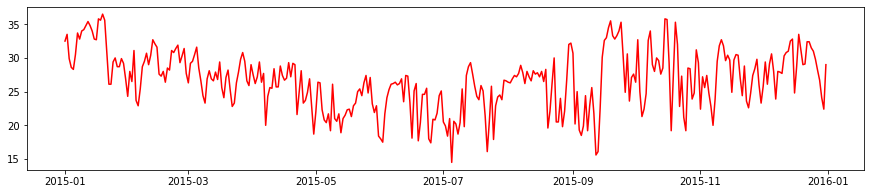

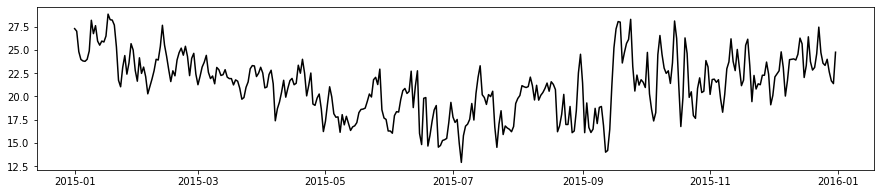

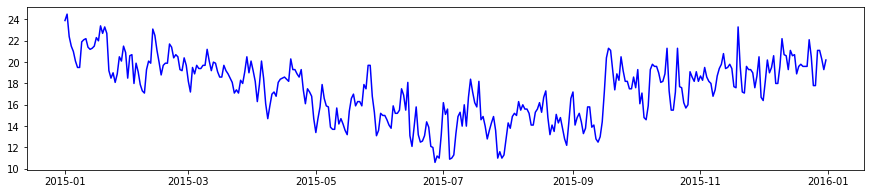

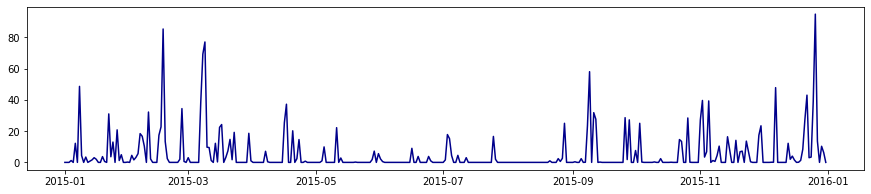

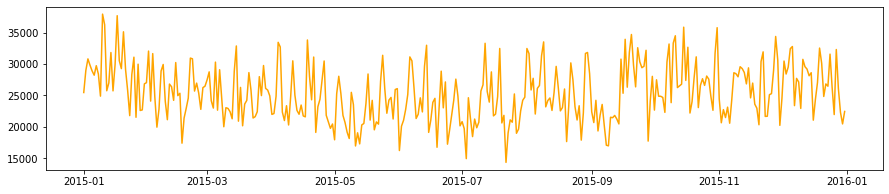

In [16]:
plt.figure(figsize=(15,3))
plt.plot('date','max_temp', data=cerveza_df, color='r')
plt.show

plt.figure(figsize=(15,3))
plt.plot('date', 'av_temp', data=cerveza_df, color='k')
plt.show

plt.figure(figsize=(15,3))
plt.plot('date', 'min_temp', data=cerveza_df, color='b')
plt.show

plt.figure(figsize=(15,3))
plt.plot('date', 'precipitation', data=cerveza_df, color='darkblue')
plt.show

plt.figure(figsize=(15,3))
plt.plot('date', 'beer_consumed', data=cerveza_df, color='orange')
plt.show

Dado que poseemos tres ejes temporales, podemos realizar una comparación de ellos, con el objetivo de reducir nuestros objetos a analizar. Para ello, se juntarán los tres gráficos de temperatura, y se le anexaran los promedios de cada uno, para ver si la columna del promedio puede ser considerada como una representante de las otras dos.

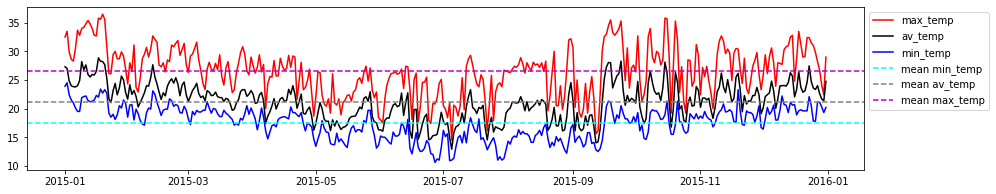

In [17]:
plt.figure(figsize=(15,3))
plt.plot('date','max_temp', data=cerveza_df, color='r')
plt.plot('date', 'av_temp', data=cerveza_df, color='k')
plt.plot('date', 'min_temp', data=cerveza_df, color='b')

plt.axhline(np.mean(cerveza_df['min_temp']), c='cyan', linestyle='--', label = 'mean min_temp')
plt.axhline(np.mean(cerveza_df['av_temp']), c='gray', linestyle='--', label = 'mean av_temp')
plt.axhline(np.mean(cerveza_df['max_temp']), c='m', linestyle='--', label = 'mean max_temp')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)

plt.show()

Como es posible de observar, existe una ligera tendencia del promedio hacia el frío, para entender esto, se analizarán los histogramas de frecuencia de las tres Series.

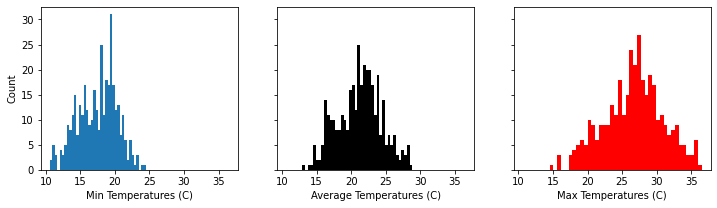

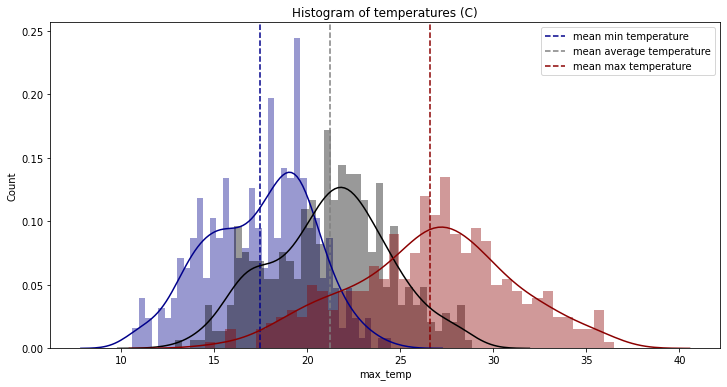

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3), sharey=True, sharex=True)
n_bins = 40

ax1.hist(cerveza_df['min_temp'], align = 'mid', bins = n_bins)
ax1.set_xlabel('Min Temperatures (C)')
ax1.set_ylabel('Count')

ax2.hist(cerveza_df['av_temp'], align = 'mid', color='k', bins = n_bins)
ax2.set_xlabel('Average Temperatures (C)')

ax3.hist(cerveza_df['max_temp'], align = 'mid', color='r', bins = n_bins)
ax3.set_xlabel('Max Temperatures (C)')

plt.show()

kwargs = dict(alpha=0.5, bins = 40, density=True, stacked = True)

plt.figure(figsize=(12,6))

x1=cerveza_df['min_temp']
x2=cerveza_df['av_temp']
x3=cerveza_df['max_temp']

plt.gca().set(title='Histogram of temperatures (C)', ylabel='Count')

plt.axvline(np.mean(x1), c='darkblue', linestyle='--', label = 'mean min temperature')
plt.axvline(np.mean(x2), c='gray', linestyle='--', label = 'mean average temperature')
plt.axvline(np.mean(x3), c='darkred', linestyle='--', label = 'mean max temperature')

sns.distplot(x1, bins=40, color='darkblue')
sns.distplot(x2, bins=40, color='k')
sns.distplot(x3, bins=40, color='darkred')

plt.legend()

Con estos gráficos, es posible apreciar que su tendencia se debe a que las temperaturas mínimas se encuentran más concentradas que las máximas, sin embargo, las máximas tienen un mayor rango muestral. Por ello, se considerará a la Serie de la temperatura promedio como representativa de las otras dos.

###Scatters

In [ ]:
Ya que se considera la temperatura promedio como representativa de las temperaturas; podemos resolver un problema con el gráfico lineal:
No se puede correlacionar las ventas con la temperatura al tener una relación con el tiempo cada una.
Por ello, consideraremos ahora como el eje 'x' los litros vendidos, mientras que en el eje 'y' puede ser la temperatura promedio o la cantidad de lluvia de esos días.

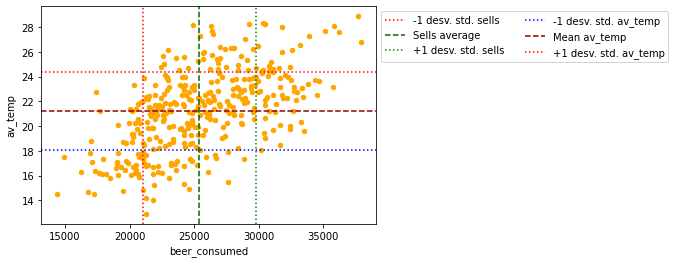

In [20]:
x=cerveza_df['beer_consumed']
y=cerveza_df['av_temp']
fig = cerveza_df.plot(kind="scatter", x = 'beer_consumed', y = 'av_temp',c = 'orange')

plt.axvline(np.mean(x)-np.std(x), c = 'r', linestyle = ':', label = '-1 desv. std. sells')
plt.axvline(np.mean(x), c = 'darkgreen', linestyle = '--', label = 'Sells average')
plt.axvline(np.mean(x)+np.std(x), c = 'g', linestyle = ':', label = '+1 desv. std. sells')

plt.axhline(np.mean(y)-np.std(y), c = 'b', linestyle = ':', label = '-1 desv. std. av_temp')
plt.axhline(np.mean(y), c = 'darkred', linestyle = '--', label = 'Mean av_temp')
plt.axhline(np.mean(y)+np.std(y), c = 'r', linestyle = ':', label = '+1 desv. std. av_temp')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)

plt.show()

En este gráfico, es posible apreciar una clara tendencia hacia arriba (positiva), confirmando una idea que es compartida por muchos amigos y conocidos:

Mientras más caliente sea el día, más cerveza se consumirá.

Con esto en mente, podríamos hacernos la misma pregunta con las lluvias:

¿Se venderá más cerveza en un día con lluvia?

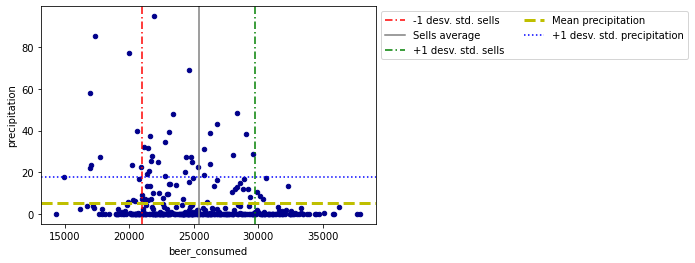

In [38]:
x=cerveza_df['beer_consumed']
y=cerveza_df['precipitation']
fig = cerveza_df.plot(kind="scatter", x = 'beer_consumed', y = 'precipitation',c = 'darkblue')

plt.axvline(np.mean(x)-np.std(x), c = 'r', linestyle = (0, (5, 2, 1, 2)), label = '-1 desv. std. sells')
plt.axvline(np.mean(x), c = 'grey', linestyle = '-', label = 'Sells average')
plt.axvline(np.mean(x)+np.std(x), c = 'g', linestyle = (0, (5, 2, 1, 2)), label = '+1 desv. std. sells')

plt.axhline(np.mean(y), c = 'y', linestyle = '--',linewidth=3 , label = 'Mean precipitation')
plt.axhline(np.mean(y)+np.std(y), c = 'b', linestyle = ':', label = '+1 desv. std. precipitation')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)

plt.show()

Con este gráfico podemos conirmar una cosa, es más probable que una buen volumen de venta se haya hecho en un día sin lluvia a uno con lluvia.

Ahora solo queda una consideración por contemplar: El fin de semana.

Dado que son datos booleanos (Verdadero-Falso), para ello se requeriran del uso de otros gráficos.

###Gráficos de barras

Los gráficos de barras son más empleados para hacer comparativos, aunque, de forma personal, prefiero usarlos para comparar casos y situaciones.
En los casos previos, es posible observar cuando un valor de venta es mayor o menor al promedio. Al agregar desviaciones estándar positivas o negativas al promedio, lo que podemos dimensionar el impacto que tienen esas ventas con respecto al resto. Ahí podemos apreciar algo alto y fuera del rango de lo "normal".

Para reducir el uso de chuncks. A continuación se muestra un comparativo de cómo sería considerar solo el promedio y considerando una desviación estándar. Ambos en la misma regla para que la dimensionalidad no se vea afectada.

Antes de ello, al tener datos Booleanos, se ejecutaran las funciones necesarias para obtener los datos necesarios.

Para extraer todos los array necesarios:

In [40]:
def csv_as_arrays(file):
    with open(beer_csv, mode="r", encoding='utf-8', newline='') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)
        
        column_data = ''
        data_date = []
        av_temp = []
        min_temp = []
        max_temp = []
        precipitation = []
        was_a_weekend = []
        beer_consumed = []
        
        for row in csv_reader:
            #No 'problem'
    
            if row[0]!= '': data_date.append(datetime.strptime(row[0], '%Y-%m-%d'))
                
            if row[5] != '': was_a_weekend.append(bool(int(row[5])))
            
            #Comma problem
            if row[1] != '': av_temp.append(float(row[1].replace(',','.')))
            if row[2] != '': min_temp.append(float(row[2].replace(',','.')))
            if row[3] != '': max_temp.append(float(row[3].replace(',','.')))
            if row[4] != '': precipitation.append(float(row[4].replace(',','.')))
            
            #Period Problem
            if row[6] != '': beer_consumed.append(int(row[6].replace('.','')))
            
    csv_file.close()

    return data_date, was_a_weekend, av_temp, min_temp, max_temp, precipitation, beer_consumed

In [43]:
data_date, was_a_weekend, av_temp, min_temp, max_temp, precipitation, beer_consumed = csv_as_arrays(beer_csv)

Funciones implementadas:

In [41]:
def ub_match_cases(array_filter, array):
  ub_match_cases = []

  #Creating Support dictionaries
  wanted_cases = set(array_filter)
  
  for ub in range(len(array)):
    val = array[ub]
    if val in wanted_cases: ub_match_cases.append(ub)
      
  return ub_match_cases

def top_condisioned(array, start_value):
  helper_array = sorted_set(array.copy())
  helpers_end = len(helper_array) - 1
  ubication =  binary_search(helper_array, 0, helpers_end, start_value)
  
  top_condisioned = []
  for i in range(ubication, helpers_end):
    top_condisioned.append(helper_array[i])

  return top_condisioned

def sorted_set(array):
  reduced_set = set(array)
  reduced_array = []
  for element in reduced_set:
    reduced_array.append(element)
  reduced_array = merge_sort(reduced_array)

  return reduced_array

def binary_search(array, start, end, search_value):
  if start > end:
    return end
  
  middle = (start + end) // 2

  if array[middle] == search_value:
    return middle
  elif array[middle] < search_value:
    return binary_search(array, middle + 1, end, search_value)
  else:
    return binary_search(array, start, middle - 1, search_value)

def merge_sort(array):
  if len(array) > 1:
    middle = len(array) // 2
    left = array[:middle]
    right = array[middle:]

    merge_sort(left)
    merge_sort(right)
    
    """SubArrays Iterators"""
    i = 0
    j = 0
    """MainArray Iterator"""
    k = 0

    while i < len(left) and j < len(right):
      if left[i] < right[j]:
        array[k] = left[i]
        i += 1
      else:
        array[k] = right[j]
        j += 1
      
      k += 1

    while i < len(left):
      array[k] = left[i]
      i += 1
      k += 1

    while j < len(right):
      array[k] = right[j]
      j += 1
      k += 1

  return array

def boolean_clasification(array):
  true_array = []
  false_array = []

  for i in range(len(array)):
    if array[i] == True:
      true_array.append(array[i])
    else: false_array.append(array[i])
  
  return true_array, false_array

def extract_matches(array_filter, array):
    match_cases = []

    #Creating Support dictionaries
    wanted_cases = set(array_filter)

    for ub in range(len(array)):
        val = array[ub]
        if val in wanted_cases: match_cases.append(array[ub])
    return match_cases

def all_major_cases(array, value):
    major_cases = []

    for ub in range(len(array)):
        if array[ub] >= value: major_cases.append(array[ub])

    return major_cases

def all_minor_cases(array, value):
    minor_cases = []

    for ub in range(len(array)):
        if array[ub] <= value: minor_cases.append(array[ub])

    return minor_cases

Extracción de los valores mayores al promedio, unicamente.

In [49]:
gta_sells = top_condisioned(beer_consumed,np.mean(beer_consumed))
ub_gta_sells = ub_match_cases(gta_sells, beer_consumed)
gta_av_temp = []
gta_week_day = []
gta_precipitation = []

for i in range(len(ub_gta_sells)):
  match = ub_gta_sells[i]
  gta_av_temp.append(av_temp[match])
  gta_week_day.append(was_a_weekend[match])
  gta_precipitation.append(precipitation[match])

gta_lens = f'''len of gta_av_temp: {len(gta_av_temp)}
len of gta_week_day: {len(gta_week_day)}
len of gta_precipitation: {len(gta_precipitation)}'''

print(gta_lens)

len of gta_av_temp: 167
len of gta_week_day: 167
len of gta_precipitation: 167


Extracción de los valores mayores al promedio y una desviación estándar.

In [51]:
pls_std_best_sells = np.mean(beer_consumed)+np.std(beer_consumed)
best_sells_values = top_condisioned(beer_consumed,pls_std_best_sells)
ub_best_sells = ub_match_cases(best_sells_values, beer_consumed)

best_sells = []
best_av_temp = []
best_week_day = []
best_precipitation = []

for i in range(len(ub_best_sells)):
  match = ub_best_sells[i]
  best_av_temp.append(av_temp[match])
  best_week_day.append(was_a_weekend[match])
  best_precipitation.append(precipitation[match])
  best_sells.append(beer_consumed[match])

best_sells_lens = f'''best_av_temp: {len(best_av_temp)}
best_week_day: {len(best_week_day)}
best_precipitation: {len(best_precipitation)}
best_sells: {len(best_sells)}'''

print(best_sells_lens)

best_av_temp: 67
best_week_day: 67
best_precipitation: 67
best_sells: 67


Lo anterior, se hizo para los análisis futuros. A continuación se muestran los resultados del coteno de las ventas mayores al promedio, así como las mejores ventas (mayores al promedio con una desviación estándar)

In [52]:
weekend_sells = [0,0]
week_sells = [0,0]

gta_weekend_sells, gta_middle_week_sells = boolean_clasification(gta_week_day)
weekend_sells[0], week_sells[0] = len(gta_weekend_sells), len(gta_middle_week_sells)

best_weekend_sells, best_middle_week_sells = boolean_clasification(best_week_day)
weekend_sells[1], week_sells[1] = len(best_weekend_sells), len(best_middle_week_sells)

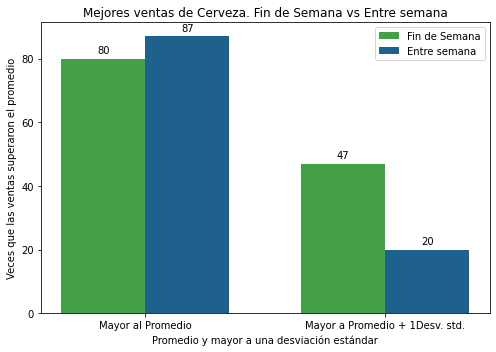

In [53]:
labels = ['Mayor al Promedio', 'Mayor a Promedio + 1Desv. std.']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(x - width/2, weekend_sells, width, label='Fin de Semana', color = '#43a047')
rects2 = ax.bar(x + width/2, week_sells, width, label='Entre semana', color = '#1f618d')

ax.set_title('Mejores ventas de Cerveza. Fin de Semana vs Entre semana')
ax.set_ylabel('Veces que las ventas superaron el promedio')
ax.set_xlabel('Promedio y mayor a una desviación estándar')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Gracias a este gráfico, podemos observar que de no ser por la consideración de la desviación estándar, estaríamos creyendo que casi no hay diferencia entre las ventas mayores al promedio. En otras palabras, que la gente no tiene una preferencia tan clara entre un fin de semana del resto de la semana para comprar cerveza.

Gracias al gráfico de la derecha, es posible ver que las mejores ventas (prom. + 1 desv. std.), mayoritariamente (2/3 de ellas) se realizan los fines de semana.

##Analizando 3 dimensiones en gráficos 2D: Mejores ventas, Fines de semana y calor.

Ahora, podrían surgir gente que alegue que eso se debe al calor. Y es normal, y es una hipótesis válida que las ventas de los fines de semana sean mayores a causa del calor, pero... ¿qué tanto?, ¿será algo considerable?
Afortunadamente para ustedes, amigos lectores, fanáticos de la cerveza y la estadística, aquí traigo la solución a esa incógnita.

Para ello, se requerirán de más funciones diseñadas a modo, por lo que, si no es de tu interés analizarlas, te invito a saltar hasta el gráfico de dona.

In [62]:
def bool_and_major_matches(bool_array, bool_wanted, numeric_array, start_limit):
    if len(bool_array) == len(numeric_array):
        match_cases = []

        #Creating Support dictionaries
        
        for ub in range(len(bool_array)):
            bool_val = bool_array[ub]
            numeric_val = numeric_array[ub]
            if bool_val == bool_wanted and numeric_val >= start_limit:
                match_cases.append(ub)
            
        return match_cases
    else: pass

def bool_and_minor_matches(bool_array, bool_wanted, numeric_array, end_limit):
    if len(bool_array) == len(numeric_array):
        match_cases = []

        #Creating Support dictionaries
        
        for ub in range(len(bool_array)):
            bool_val = bool_array[ub]
            numeric_val = numeric_array[ub]
            if bool_val == bool_wanted and numeric_val <= end_limit:
                match_cases.append(ub)
            
        return match_cases
    else: pass

def amount_cases_bool_numeric(bool_array, numeric_array , minor_limit, increment):
    '''Returned data:
    1) amount_c1 = number of cases that are True and minor_limit + increment
    1) amount_c2 = number of cases that are True and minor_limit
    1) amount_c3 = number of cases that are False and minor_limit + increment
    1) amount_c4 = number of cases that are False and minor_limit'''
    
    if len(bool_array)==len(numeric_array):
        search_value = minor_limit + increment
        amount_cases = [0,0,0,0]

        amount_cases[0] = len(bool_and_major_matches(bool_array, True, numeric_array, search_value))
        amount_cases[1] = len(bool_and_minor_matches(bool_array, True, numeric_array, minor_limit))
        
        amount_cases[2] = len(bool_and_major_matches(bool_array, False, numeric_array, search_value))
        amount_cases[3] = len(bool_and_minor_matches(bool_array, False, numeric_array, minor_limit))

        return amount_cases
    else: pass

In [57]:
taw_best_sells = amount_cases_bool_numeric(best_week_day, best_av_temp, np.mean(av_temp), 0.01)
hot_bs_days = [0,0]
cold_bs_days = [0,0]

hot_bs_days[0],hot_bs_days[1] = taw_best_sells[0], taw_best_sells[2]
cold_bs_days[0],cold_bs_days[1] = taw_best_sells[1], taw_best_sells[3]

###Gráfico de Dona con Intersección de 3 condiciones.

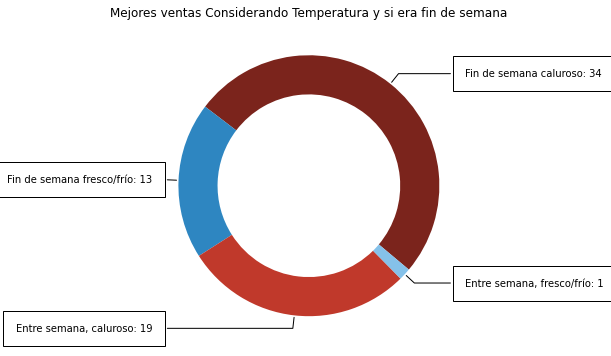

In [58]:
#Making of labels
taw_labels = [0,0,0,0]
taw_labels[0]= 'Fin de semana caluroso: ' + str(taw_best_sells[0])
taw_labels[1]= 'Fin de semana fresco/frío: ' + str(taw_best_sells[1])
taw_labels[2]= 'Entre semana, caluroso: ' + str(taw_best_sells[2])
taw_labels[3]= 'Entre semana, fresco/frío: ' + str(taw_best_sells[3])

#colors
pie_colors = ['#7b241c', '#2e86c1','#c0392b','#85c1e9']

#Creating plot
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(taw_best_sells, wedgeprops=dict(width=.3), startangle=-40, colors=pie_colors)

bbox_props = dict(boxstyle="square,pad=1.25", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate(taw_labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Mejores ventas Considerando Temperatura y si era fin de semana")

plt.show()

###Scatter Plot de temperatura considerando categorías

Una de las ventajas de est gráfico, es que estamos usando la teoría de grupos para analizar 3 dimensiones en una sola. Recapitulando desde la última agregada hasta la primera:
<ol>
<li>¿Es fin de semana?: z = Boool</li>
<li>¿Hacia calor ese día?: Av_temp considerando que {y>=promedio(av_temp) = caliente | y<=promedio(av_temp) = fresco/frío</li>
<li>¿Era una de las mejores ventas?: x>= promedio(beer_consumed) + 1desv.std </li>
</ol>

Considerando esto, podemos agregar esta clasificación booleana y condisionante sobre la temperatura para analizar con mejor resolución los gráficos de temperatura y precipitaciones.

In [59]:
category = []

for i in range(len(beer_consumed)):
    if beer_consumed[i] >= (np.mean(beer_consumed) + np.std(beer_consumed)):
        #Hot Cases
        if av_temp[i] >= np.mean(av_temp) and was_a_weekend[i] == True:
            category.append('Hot Weekend')
        elif av_temp[i] >= np.mean(av_temp) and was_a_weekend[i] == False:
            category.append('Hot and Not Weekend')

        #Cold Cases
        elif av_temp[i] <= np.mean(av_temp) and was_a_weekend[i] == True:
            category.append('Cold/Fresh Weekend')
        elif av_temp[i] <= np.mean(av_temp) and was_a_weekend[i] == False:
            category.append('Cold/Fresh and Not Weekend')
    else:
        category.append('N/A')

print(np.mean(av_temp))
cerveza_df.insert(7,'category',category)
cerveza_df.head()

21.226356164383564


,date,av_temp,min_temp,max_temp,precipitation,was_a_weekend,beer_consumed,category
0,2015-01-01,27.30,23.9,32.5,0.0,False,25461,N/A
1,2015-01-02,27.02,24.5,33.5,0.0,False,28972,N/A
2,2015-01-03,24.82,22.4,29.9,0.0,True,30814,Hot Weekend
3,2015-01-04,23.98,21.5,28.6,1.2,True,29799,Hot Weekend
4,2015-01-05,23.82,21.0,28.3,0.0,False,28900,N/A


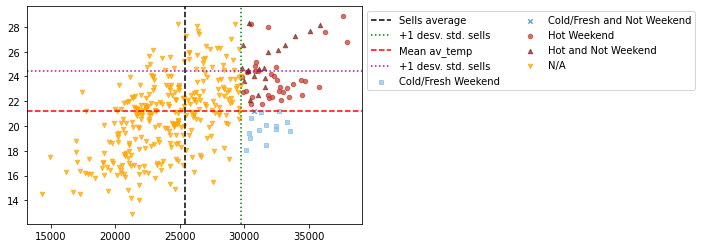

In [63]:
x=cerveza_df['beer_consumed']
y=cerveza_df['av_temp']
groups=cerveza_df.groupby('category')
#[,N/A]
scatter_colors = ['#85c1e9','#2e86c1','#c0392b','#7b241c', 'orange']
from mlxtend.plotting import category_scatter

fig = category_scatter(x = 'beer_consumed', y = 'av_temp', label_col='category',
                       data=cerveza_df, colors=scatter_colors)

plt.axvline(np.mean(x), c = 'k', linestyle = '--', label = 'Sells average')
plt.axvline(np.mean(x)+np.std(x), c = 'g', linestyle = ':', label = '+1 desv. std. sells')

plt.axhline(np.mean(y), c = 'r', linestyle = '--', label = 'Mean av_temp')
plt.axhline(np.mean(y)+np.std(y), c = 'm', linestyle = ':', label = '+1 desv. std. sells')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)

plt.show()

Como es posible observar, las mejores ventas del fin de semana sucedieron en los días de extremo calor. Cabe resaltar, que conforme aumentó la temperatura, las ventas entre semana aumentaban considerablemente. Si quieres saber el número de cada uno de los grupos, puedes revisar las etiquetas del gráfico de la dona ;)

###Scatter Plot de precipitaciones considerando categorías

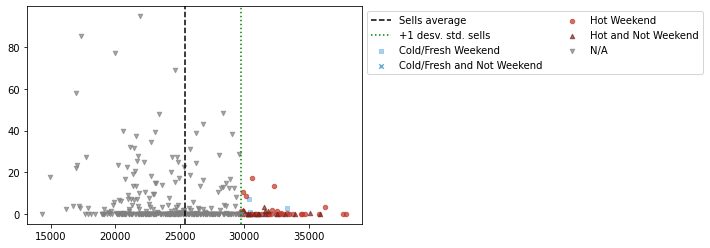

In [61]:
x=cerveza_df['beer_consumed']
y=cerveza_df['precipitation']
groups=cerveza_df.groupby('category')
#[,N/A]
scatter_colors = ['#85c1e9','#2e86c1','#c0392b','#7b241c', 'grey']
from mlxtend.plotting import category_scatter

fig = category_scatter(x = 'beer_consumed', y = 'precipitation', label_col='category',
                       data=cerveza_df, colors=scatter_colors)

plt.axvline(np.mean(x), c = 'k', linestyle = '--', label = 'Sells average')
plt.axvline(np.mean(x)+np.std(x), c = 'g', linestyle = ':', label = '+1 desv. std. sells')

plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=2)

plt.show()

Una ventaja de este gráfico, y a cómo se pudo observar con el de temperatura, es que la mayoría de las ventas se hicieron en días con poca lluvia, por ende, en este tipo de climas, días más calurosos.

##Conclusiones

Si eres un mercadólogo que trabaja en Sao Paulo, y buscas aumentar tus volúmenes de venta de cerveza, recuerda que la gente prefiere beber cerveza en:
<ol>
<li>días calurosos,</li>
<li>fines de semana,</li>
<li>donde no llueva mucho (menos de 20 mm)</li>
</ol>

Por lo que deberás de considerar esto para tus estrategias de promoción para los meses de invierno; y de logística y distribución para los meses de primavera y verano si no quieres quedarte sin abasto.